### 39. Methodenseminar
## Big Data Module II: Introduction to Social Network Science with Python
# 1.2 Network Construction and Centrality (Demo)
**Author**: <a href='https://www.gesis.org/person/haiko.lietz'>Haiko Lietz</a>, GESIS - Leibniz Institute for the Social Sciences

**Date**: 15 July 2019

**Library versions**: ``networkx`` 2.3 ([documentation](https://networkx.github.io/documentation/))

***
## Table of Contents
#### [1.2.1 Unipartite Networks](#1_2_1)
[1.2.1.1 Create Graph Objects](#1_2_1_1) |
[1.2.1.2 Populate Graph Object Using Labels and Loops](#1_2_1_2) |
[1.2.1.3 Populate DiGraph Object Using Integers and Lists](#1_2_1_3) |
[1.2.1.4 Convert Node Labels to Integers](#1_2_1_4)
#### [1.2.2 Multigraphs, Weights, Attributes, and Plotting](#1_2_2)
[1.2.2.1 The Medici MultiDiGraph](#1_2_2_1) |
[1.2.2.2 Set-Like Views of Graphs](#1_2_2_2) |
[1.2.2.3 Node-Level Views](#1_2_2_3)
#### [1.2.3 Centrality](#1_2_3)
#### [1.2.4 Bipartite Networks and Link Communities](#1_2_4)
[1.2.4.1 Selection Graph](#1_2_4_1) |
[1.2.4.2 Projection to Transaction Co-Fact Graph](#1_2_4_2) |
[1.2.4.3 Projection to Fact Co-Transaction Graph](#1_2_4_3) |
[1.2.4.4 Duality of Groups and Link Communities](#1_2_4_4)
***

## 1.2.1 Unipartite Networks <a name='1_2_1'></a>

In [1]:
import networkx as nx

In [2]:
nx.__version__

'2.2'

### 1.2.1.1 Create Graph Objects <a name='1_2_1_1'></a>

``Graph`` and ``DiGraph`` objects allow self-loops but not parallel edges.

In [3]:
G = nx.Graph()

In [4]:
type(G)

networkx.classes.graph.Graph

In [5]:
D = nx.DiGraph()

In [6]:
type(D)

networkx.classes.digraph.DiGraph

### 1.2.1.2 Populate Graph Object Using Labels and Loops <a name='1_2_1_2'></a>

#### Nodes

In [7]:
G.add_node('Alice')

In [8]:
G.nodes

NodeView(('Alice',))

In [9]:
list(G.nodes)

['Alice']

In [10]:
G.remove_node('Alice')

In [11]:
G.nodes

NodeView(())

In [12]:
nodes_label = ['Alice', 'Bob', 'Carol']

In [13]:
for label in nodes_label:
    G.add_node(label)

In [14]:
G.nodes

NodeView(('Alice', 'Bob', 'Carol'))

In [15]:
G.number_of_nodes()

3

#### Edges

In [16]:
G.add_edge('Alice', 'Bob')

In [17]:
G.edges

EdgeView([('Alice', 'Bob')])

In [18]:
list(G.edges)

[('Alice', 'Bob')]

In [19]:
G.remove_edge('Alice', 'Bob')

In [20]:
G.edges

EdgeView([])

In [21]:
edges_label = [('Alice', 'Bob'), ('Alice', 'Carol'), ('Bob', 'Carol')]

In [22]:
for edge in range(0, len(edges_label)):
    G.add_edge(edges_label[edge][0], edges_label[edge][1])

In [23]:
G.edges

EdgeView([('Alice', 'Bob'), ('Alice', 'Carol'), ('Bob', 'Carol')])

In [24]:
G.number_of_edges()

3

### 1.2.1.3 Populate DiGraph Object Using Integers and Lists <a name='1_2_1_3'></a>

Now using convenience functions to add nodes and edges from lists.

In [25]:
nodes = [1, 2, 3]

In [26]:
D.add_nodes_from(nodes)

In [27]:
D.nodes

NodeView((1, 2, 3))

In [28]:
edges = [(1, 2), (1, 3), (2, 3)]

In [29]:
D.add_edges_from(edges)

In [30]:
D.edges

OutEdgeView([(1, 2), (1, 3), (2, 3)])

### 1.2.1.4 Convert Node Labels to Integers <a name='1_2_1_4'></a>

In [31]:
G_int = nx.convert_node_labels_to_integers(G)

In [32]:
G_int.nodes

NodeView((0, 1, 2))

In [33]:
G_int.edges

EdgeView([(0, 1), (0, 2), (1, 2)])

## 1.2.2 Multigraphs, Weights, Attributes, and Plotting <a name='1_2_2'></a>

### 1.2.2.1 The Medici MultiDiGraph <a name='1_2_2_1'></a>

<img src='images/medici.jpg'>

In [34]:
import pandas as pd

In [35]:
families = pd.read_csv('../data/medici/families.txt', header='infer', delimiter='\t', encoding='utf-8')
families.head()

,family_id,family,party,wealth,year,size,numbers_active_medici,numbers_active_oligarch,numbers_active_neutral
0,0,ALBIZZI,OLIGARCH,49988,1314,5,4,12,0
1,1,ALDOBRANDINI,OLIGARCH,5403,1306,2,0,2,0
2,2,ALTOVITI,OLIGARCH,25874,1321,3,1,5,1
3,3,ARDINGHELLI,OLIGARCH,48364,1297,2,1,2,0
4,4,BARONCELLI,OLIGARCH,46308,1285,2,0,1,1


#### Single Domains

The friendship domain is the only undirected one.

In [36]:
friendship = pd.read_csv('../data/medici/friendship.txt', header='infer', delimiter='\t', encoding='utf-8')
friendship

,family_i,family_j,weight
0,GUICCIARDINI,MEDICI,1
1,MEDICI,ALBIZZI,1
2,STROZZI,RUCELLAI,1
3,MEDICI,GUICCIARDINI,1
4,GUICCIARDINI,STROZZI,1
5,ALBIZZI,MEDICI,1
6,STROZZI,GUICCIARDINI,1
7,RUCELLAI,STROZZI,1
8,STROZZI,PERUZZI,1
9,GUASCONI,ALBIZZI,1


In [37]:
M_friendship = nx.Graph()

In [38]:
M_friendship.add_nodes_from(families['family'].values)

Note that we are adding weighted edges now, even though all weights are 1. ``weight`` is stored as an edge attribute.

In [39]:
M_friendship.add_weighted_edges_from(friendship.values)

To display attributes, set ``data=True``).

In [40]:
M_friendship.edges(data=True)

EdgeDataView([('ALBIZZI', 'MEDICI', {'weight': 1}), ('ALBIZZI', 'GUASCONI', {'weight': 1}), ('CASTELLANI', 'GUASCONI', {'weight': 1}), ('GUICCIARDINI', 'MEDICI', {'weight': 1}), ('GUICCIARDINI', 'STROZZI', {'weight': 1}), ('PERUZZI', 'STROZZI', {'weight': 1}), ('RUCELLAI', 'STROZZI', {'weight': 1})])

In [41]:
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


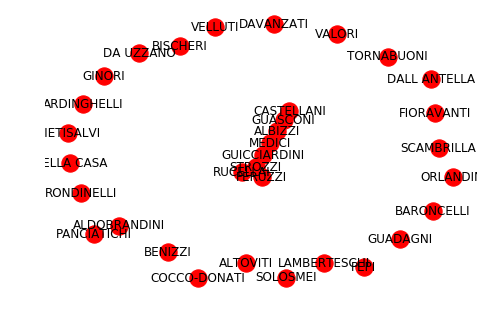

In [43]:
nx.draw(M_friendship, with_labels=True)

In [44]:
M_friendship.clear()

In [45]:
M_friendship.add_weighted_edges_from(friendship.values)

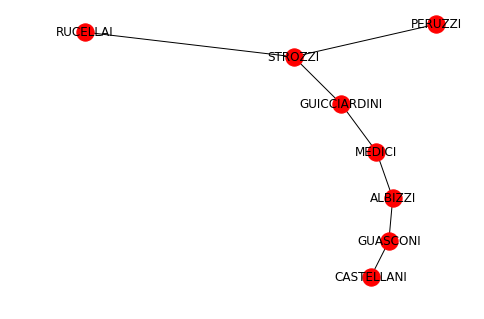

In [46]:
nx.draw(M_friendship, with_labels=True)

In [47]:
economic = pd.read_csv('../data/medici/economic.txt', header='infer', delimiter='\t', encoding='utf-8')
economic.head()

,family_i,family_j,weight
0,RONDINELLI,GUASCONI,1
1,CASTELLANI,RONDINELLI,1
2,PERUZZI,CASTELLANI,1
3,MEDICI,GINORI,3
4,GINORI,MEDICI,1


In [48]:
M_economic = nx.DiGraph()

In [49]:
M_economic.add_weighted_edges_from(economic.values)

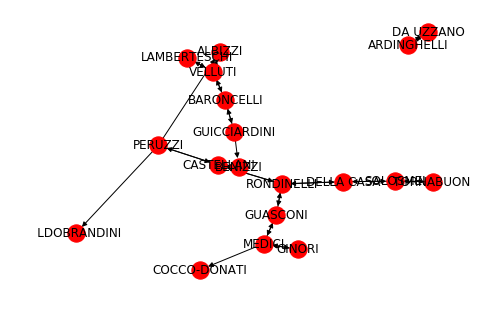

In [50]:
nx.draw(M_economic, with_labels=True)

In [51]:
political = pd.read_csv('../data/medici/political.txt', header='infer', delimiter='\t', encoding='utf-8')
political.head()

,family_i,family_j,weight
0,MEDICI,ALBIZZI,1
1,MEDICI,GUASCONI,2
2,MEDICI,GUICCIARDINI,1
3,MEDICI,TORNABUONI,1
4,MEDICI,GINORI,1


In [52]:
kinship = pd.read_csv('../data/medici/kinship.txt', header='infer', delimiter='\t', encoding='utf-8')
kinship.head()

,family_i,family_j,weight
0,GUADAGNI,BISCHERI,1
1,FIORAVANTI,GUADAGNI,1
2,DALL ANTELLA,GINORI,1
3,DAVANZATI,ORLANDINI,1
4,VALORI,COCCO-DONATI,1


#### Graph Functions

In [53]:
nx.density(M_economic)

0.0935672514619883

In [54]:
print(nx.info(M_economic))

Name: 
Type: DiGraph
Number of nodes: 19
Number of edges: 32
Average in degree:   1.6842
Average out degree:   1.6842


In [55]:
M_economic.is_directed()

True

In [56]:
M_economic.to_undirected()

In [57]:
nx.is_connected(M_economic.to_undirected())

False

This will extract the largest connected component:

In [58]:
M_economic_lcc = max(nx.connected_component_subgraphs(M_economic.to_undirected(), copy=True), key=len)

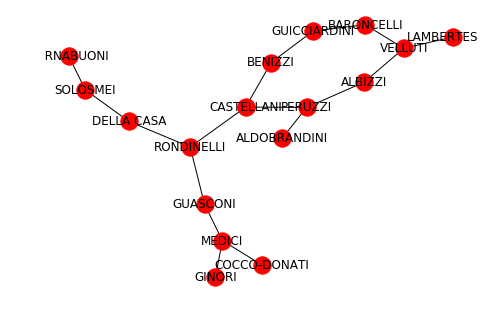

In [59]:
nx.draw(M_economic_lcc, with_labels=True)

#### MultiDiGraph

In [60]:
M = nx.MultiDiGraph()

In [61]:
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']

In [62]:
M.add_weighted_edges_from(friendship.values, color=colors[6])

In [63]:
M.add_weighted_edges_from(economic.values, color=colors[4])

In [64]:
M.add_weighted_edges_from(political.values, color=colors[2])

In [65]:
M.add_weighted_edges_from(kinship.values, color=colors[3])

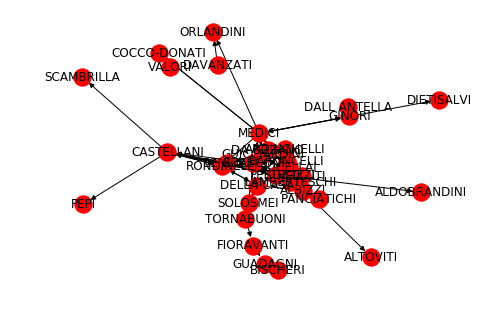

In [66]:
nx.draw(M, with_labels=True)

#### Node Positions

In [67]:
1/M.number_of_nodes()**.5

0.17407765595569785

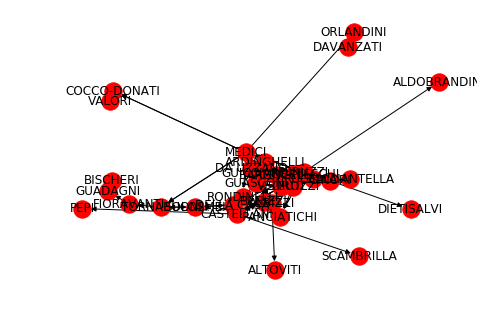

In [68]:
M_pos = nx.spring_layout(M, k=0.17, iterations=50, weight='weight', seed=0)
nx.draw(M, pos=M_pos, with_labels=True)

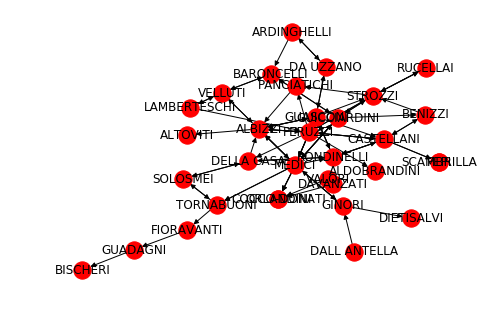

In [132]:
M_pos = nx.kamada_kawai_layout(M, weight='weight')
nx.draw(M, pos=M_pos, with_labels=True)

In [71]:
import numpy as np

In [72]:
M_pos = {'ALBIZZI': np.array([-0.006, -0.1166]),
         'ALDOBRANDINI': np.array([0.063, -0.4]),
         'ALTOVITI': np.array([0.1944, -0.1514]),
         'ARDINGHELLI': np.array([-0.3648, -0.1236]),
         'BARONCELLI': np.array([-0.2912, -0.1793]),
         'BENIZZI': np.array([-0.0727, -0.2918]),
         'BISCHERI': np.array([0.4, 0.4]),
         'CASTELLANI': np.array([0.0869, -0.2025]),
         'COCCO-DONATI': np.array([-0.1493, 0.1514]),
         'DA UZZANO': np.array([-0.266, -0.1034]),
         'DALL ANTELLA': np.array([-0.327, 0.2273]),
         'DAVANZATI': np.array([-0.0352, 0.3202]),
         'DELLA CASA': np.array([0.1161, -0.0902]),
         'DIETISALVI': np.array([-0.4, 0.1282]),
         'FIORAVANTI': np.array([0.1891, 0.2327]),
         'GINORI': np.array([-0.2381, 0.1034]),
         'GUADAGNI': np.array([0.2978, 0.3171]),
         'GUASCONI': np.array([-0.0852, -0.1171]),
         'GUICCIARDINI': np.array([-0.1761, -0.0705]),
         'LAMBERTESCHI': np.array([-0.0988, -0.3667]),
         'MEDICI': np.array([-0.0776, 0.0391]),
         'ORLANDINI': np.array([-0.0405, 0.1715]),
         'PANCIATICHI': np.array([-0.0034, -0.2863]),
         'PEPI': np.array([0.2527, -0.242]),
         'PERUZZI': np.array([0.0216, -0.205]),
         'RONDINELLI': np.array([0.0179, -0.0306]),
         'RUCELLAI': np.array([-0.2249, -0.3899]),
         'SCAMBRILLA': np.array([0.1811, -0.3404]),
         'SOLOSMEI': np.array([0.197, 0.036]),
         'STROZZI': np.array([-0.1307, -0.2474]),
         'TORNABUONI': np.array([0.0776, 0.1251]),
         'VALORI': np.array([-0.2103, 0.304]),
         'VELLUTI': np.array([-0.1851, -0.2474])}

#### Node Attributes

In [73]:
type(M.nodes['MEDICI'])

dict

In [74]:
for i in range(0, len(families)):
    M.nodes[families['family'][i]]['party'] = families['party'][i]

In [75]:
for i in range(0, len(families)):
    M.nodes[families['family'][i]]['wealth'] = families['wealth'][i]

In [76]:
M.nodes(data=True)

NodeDataView({'GUICCIARDINI': {'party': 'MEDICI', 'wealth': 40617}, 'MEDICI': {'party': 'MEDICI', 'wealth': 82702}, 'ALBIZZI': {'party': 'OLIGARCH', 'wealth': 49988}, 'STROZZI': {'party': 'OLIGARCH', 'wealth': 135765}, 'RUCELLAI': {'party': 'OLIGARCH', 'wealth': 31297}, 'PERUZZI': {'party': 'OLIGARCH', 'wealth': 50125}, 'GUASCONI': {'party': 'OLIGARCH', 'wealth': 85300}, 'CASTELLANI': {'party': 'OLIGARCH', 'wealth': 37118}, 'RONDINELLI': {'party': 'OLIGARCH', 'wealth': 14529}, 'GINORI': {'party': 'MEDICI', 'wealth': 21167}, 'BARONCELLI': {'party': 'OLIGARCH', 'wealth': 46308}, 'TORNABUONI': {'party': 'MEDICI', 'wealth': 42840}, 'SOLOSMEI': {'party': 'OLIGARCH', 'wealth': 5757}, 'ARDINGHELLI': {'party': 'OLIGARCH', 'wealth': 48364}, 'DA UZZANO': {'party': 'OLIGARCH', 'wealth': 48066}, 'DELLA CASA': {'party': 'OLIGARCH', 'wealth': 46875}, 'VELLUTI': {'party': 'OLIGARCH', 'wealth': 14054}, 'LAMBERTESCHI': {'party': 'OLIGARCH', 'wealth': 32388}, 'BENIZZI': {'party': 'OLIGARCH', 'wealth': 1

#### Node Size

In [77]:
M_node_size = list(nx.get_node_attributes(M, 'wealth').values())
M_node_size = [x/50 for x in M_node_size]
M_node_size[:5]

[812.34, 1654.04, 999.76, 2715.3, 625.94]

#### Node Color

In [78]:
M_node_color = nx.get_node_attributes(M, 'party')
M_node_color

{'GUICCIARDINI': 'MEDICI',
 'MEDICI': 'MEDICI',
 'ALBIZZI': 'OLIGARCH',
 'STROZZI': 'OLIGARCH',
 'RUCELLAI': 'OLIGARCH',
 'PERUZZI': 'OLIGARCH',
 'GUASCONI': 'OLIGARCH',
 'CASTELLANI': 'OLIGARCH',
 'RONDINELLI': 'OLIGARCH',
 'GINORI': 'MEDICI',
 'BARONCELLI': 'OLIGARCH',
 'TORNABUONI': 'MEDICI',
 'SOLOSMEI': 'OLIGARCH',
 'ARDINGHELLI': 'OLIGARCH',
 'DA UZZANO': 'OLIGARCH',
 'DELLA CASA': 'OLIGARCH',
 'VELLUTI': 'OLIGARCH',
 'LAMBERTESCHI': 'OLIGARCH',
 'BENIZZI': 'OLIGARCH',
 'ALDOBRANDINI': 'OLIGARCH',
 'COCCO-DONATI': 'MEDICI',
 'FIORAVANTI': 'OLIGARCH',
 'ORLANDINI': 'MEDICI',
 'GUADAGNI': 'OLIGARCH',
 'BISCHERI': 'OLIGARCH',
 'DALL ANTELLA': 'MEDICI',
 'DAVANZATI': 'MEDICI',
 'VALORI': 'MEDICI',
 'DIETISALVI': 'MEDICI',
 'ALTOVITI': 'OLIGARCH',
 'PEPI': 'OLIGARCH',
 'SCAMBRILLA': 'OLIGARCH',
 'PANCIATICHI': 'OLIGARCH'}

In [79]:
party_color = {'OLIGARCH':'#e41a1c', 'MEDICI':'#377eb8'}

In [80]:
M_node_color = [party_color[party] for party in M_node_color.values()]
M_node_color[:5]

['#377eb8', '#377eb8', '#e41a1c', '#e41a1c', '#e41a1c']

#### Edge Width

In [81]:
M_width = list(nx.get_edge_attributes(M, 'weight').values())
M_width = [2*x for x in M_width]
M_width[:5]

[2, 2, 2, 2, 2]

#### Edge Colors

In [82]:
M_edge_color = list(nx.get_edge_attributes(M, 'color').values())
M_edge_color[:5]

['#a65628', '#984ea3', '#a65628', '#ff7f00', '#ff7f00']

#### Plot

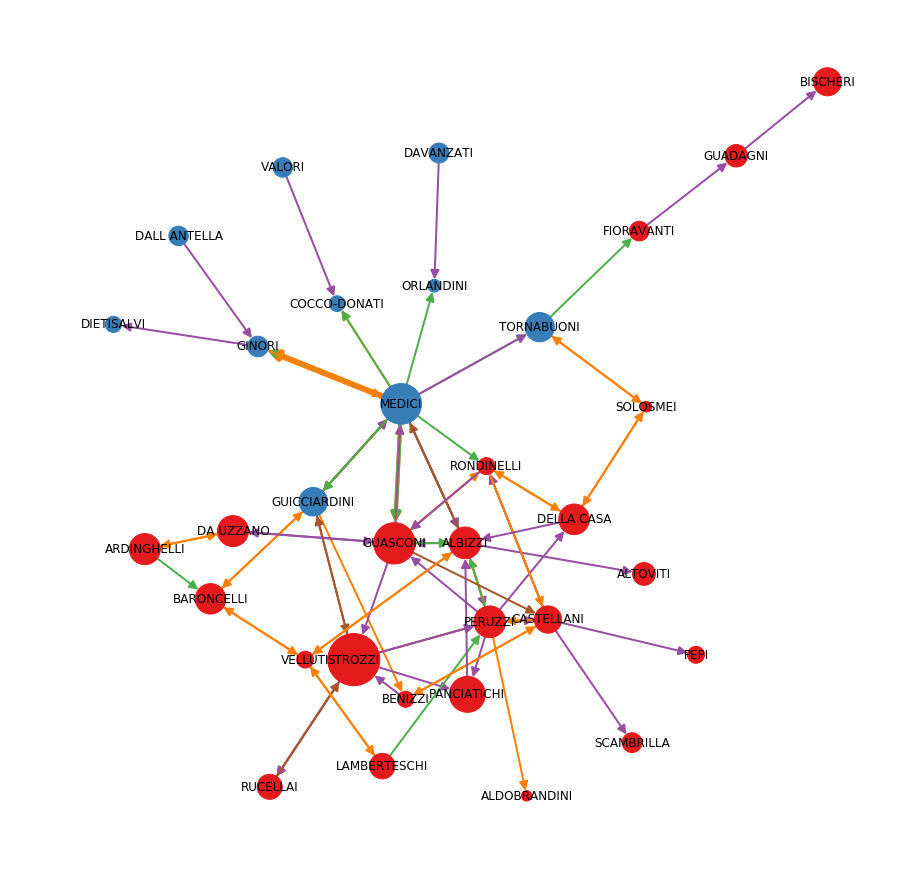

In [83]:
plt.figure(figsize=(12, 12))
nx.draw(M, pos=M_pos, arrowsize=18, with_labels=True, node_size=M_node_size, node_color=M_node_color, width=M_width, edge_color=M_edge_color)
#plt.savefig('medici.pdf')
#plt.savefig('medici.png')

### 1.2.2.2 Set-Like Views of Graphs <a name='1_2_2_2'></a>

These views are node-level descriptors of the whole graph.

In [84]:
M_friendship.nodes(data=True)

NodeDataView({'GUICCIARDINI': {}, 'MEDICI': {}, 'ALBIZZI': {}, 'STROZZI': {}, 'RUCELLAI': {}, 'PERUZZI': {}, 'GUASCONI': {}, 'CASTELLANI': {}})

In [85]:
M_friendship.edges(data=True)

EdgeDataView([('GUICCIARDINI', 'MEDICI', {'weight': 1}), ('GUICCIARDINI', 'STROZZI', {'weight': 1}), ('MEDICI', 'ALBIZZI', {'weight': 1}), ('ALBIZZI', 'GUASCONI', {'weight': 1}), ('STROZZI', 'RUCELLAI', {'weight': 1}), ('STROZZI', 'PERUZZI', {'weight': 1}), ('GUASCONI', 'CASTELLANI', {'weight': 1})])

#### Undirected graphs

In [86]:
M_friendship.adj

AdjacencyView({'GUICCIARDINI': {'MEDICI': {'weight': 1}, 'STROZZI': {'weight': 1}}, 'MEDICI': {'GUICCIARDINI': {'weight': 1}, 'ALBIZZI': {'weight': 1}}, 'ALBIZZI': {'MEDICI': {'weight': 1}, 'GUASCONI': {'weight': 1}}, 'STROZZI': {'RUCELLAI': {'weight': 1}, 'GUICCIARDINI': {'weight': 1}, 'PERUZZI': {'weight': 1}}, 'RUCELLAI': {'STROZZI': {'weight': 1}}, 'PERUZZI': {'STROZZI': {'weight': 1}}, 'GUASCONI': {'ALBIZZI': {'weight': 1}, 'CASTELLANI': {'weight': 1}}, 'CASTELLANI': {'GUASCONI': {'weight': 1}}})

In [87]:
M_friendship.degree

DegreeView({'GUICCIARDINI': 2, 'MEDICI': 2, 'ALBIZZI': 2, 'STROZZI': 3, 'RUCELLAI': 1, 'PERUZZI': 1, 'GUASCONI': 2, 'CASTELLANI': 1})

#### Directed graphs

In [88]:
M_economic.adj

AdjacencyView({'RONDINELLI': {'GUASCONI': {'weight': 1}, 'DELLA CASA': {'weight': 1}, 'CASTELLANI': {'weight': 1}}, 'GUASCONI': {'RONDINELLI': {'weight': 1}, 'MEDICI': {'weight': 1}}, 'CASTELLANI': {'RONDINELLI': {'weight': 1}, 'PERUZZI': {'weight': 1}, 'BENIZZI': {'weight': 1}}, 'PERUZZI': {'CASTELLANI': {'weight': 1}, 'ALBIZZI': {'weight': 1}, 'ALDOBRANDINI': {'weight': 1}}, 'MEDICI': {'GINORI': {'weight': 3}, 'GUASCONI': {'weight': 2}, 'COCCO-DONATI': {'weight': 1}}, 'GINORI': {'MEDICI': {'weight': 1}}, 'GUICCIARDINI': {'BARONCELLI': {'weight': 1}, 'BENIZZI': {'weight': 1}}, 'BARONCELLI': {'GUICCIARDINI': {'weight': 1}, 'VELLUTI': {'weight': 1}}, 'TORNABUONI': {'SOLOSMEI': {'weight': 1}}, 'SOLOSMEI': {'TORNABUONI': {'weight': 1}, 'DELLA CASA': {'weight': 1}}, 'ARDINGHELLI': {'DA UZZANO': {'weight': 1}}, 'DA UZZANO': {'ARDINGHELLI': {'weight': 1}}, 'DELLA CASA': {'SOLOSMEI': {'weight': 1}, 'RONDINELLI': {'weight': 1}}, 'ALBIZZI': {'VELLUTI': {'weight': 1}}, 'VELLUTI': {'ALBIZZI': {'w

In [89]:
M_economic.degree

DiDegreeView({'RONDINELLI': 6, 'GUASCONI': 4, 'CASTELLANI': 6, 'PERUZZI': 4, 'MEDICI': 5, 'GINORI': 2, 'GUICCIARDINI': 3, 'BARONCELLI': 4, 'TORNABUONI': 2, 'SOLOSMEI': 4, 'ARDINGHELLI': 2, 'DA UZZANO': 2, 'DELLA CASA': 4, 'ALBIZZI': 3, 'VELLUTI': 6, 'LAMBERTESCHI': 2, 'BENIZZI': 3, 'ALDOBRANDINI': 1, 'COCCO-DONATI': 1})

In [90]:
M_economic.degree(weight='weight')

DiDegreeView({'RONDINELLI': 6, 'GUASCONI': 5, 'CASTELLANI': 6, 'PERUZZI': 4, 'MEDICI': 8, 'GINORI': 4, 'GUICCIARDINI': 3, 'BARONCELLI': 4, 'TORNABUONI': 2, 'SOLOSMEI': 4, 'ARDINGHELLI': 2, 'DA UZZANO': 2, 'DELLA CASA': 4, 'ALBIZZI': 3, 'VELLUTI': 6, 'LAMBERTESCHI': 2, 'BENIZZI': 3, 'ALDOBRANDINI': 1, 'COCCO-DONATI': 1})

In [91]:
M_economic.out_degree(weight='weight')

OutDegreeView({'RONDINELLI': 3, 'GUASCONI': 2, 'CASTELLANI': 3, 'PERUZZI': 3, 'MEDICI': 6, 'GINORI': 1, 'GUICCIARDINI': 2, 'BARONCELLI': 2, 'TORNABUONI': 1, 'SOLOSMEI': 2, 'ARDINGHELLI': 1, 'DA UZZANO': 1, 'DELLA CASA': 2, 'ALBIZZI': 1, 'VELLUTI': 3, 'LAMBERTESCHI': 1, 'BENIZZI': 1, 'ALDOBRANDINI': 0, 'COCCO-DONATI': 0})

In [92]:
M_economic.in_degree(weight='weight')

InDegreeView({'RONDINELLI': 3, 'GUASCONI': 3, 'CASTELLANI': 3, 'PERUZZI': 1, 'MEDICI': 2, 'GINORI': 3, 'GUICCIARDINI': 1, 'BARONCELLI': 2, 'TORNABUONI': 1, 'SOLOSMEI': 2, 'ARDINGHELLI': 1, 'DA UZZANO': 1, 'DELLA CASA': 2, 'ALBIZZI': 2, 'VELLUTI': 3, 'LAMBERTESCHI': 1, 'BENIZZI': 2, 'ALDOBRANDINI': 1, 'COCCO-DONATI': 1})

### 1.2.2.3 Node-Level Views <a name='1_2_2_3'></a>

These views are descriptors of individual nodes and edges.

In [93]:
M.nodes['MEDICI']

{'party': 'MEDICI', 'wealth': 82702}

In [94]:
M['MEDICI']['ALBIZZI']

AtlasView({0: {'color': '#a65628', 'weight': 1}, 1: {'color': '#4daf4a', 'weight': 1}, 2: {'color': '#984ea3', 'weight': 1}})

#### Undirected graphs

In [95]:
list(M_friendship.neighbors('MEDICI'))

['GUICCIARDINI', 'ALBIZZI']

In [96]:
M_friendship.degree('MEDICI')

2

#### Directed graphs

In [97]:
list(M_economic.predecessors('MEDICI'))

['GINORI', 'GUASCONI']

In [98]:
list(M_economic.successors('MEDICI'))

['GINORI', 'GUASCONI', 'COCCO-DONATI']

In [99]:
M_economic.degree('MEDICI', weight='weight')

8

In [100]:
M_economic.out_degree('MEDICI', weight='weight')

6

In [101]:
M_economic.in_degree('MEDICI', weight='weight')

2

## 1.2.3 Centrality <a name='1_2_3'></a>

#### Degree Centrality

In [102]:
M_degree_centrality = list(nx.degree_centrality(M).values())
M_degree_centrality = [2000/max(M_degree_centrality)*x for x in M_degree_centrality]
M_degree_centrality[:5]

[857.1428571428571,
 2000.0,
 1428.5714285714287,
 952.3809523809524,
 285.7142857142857]

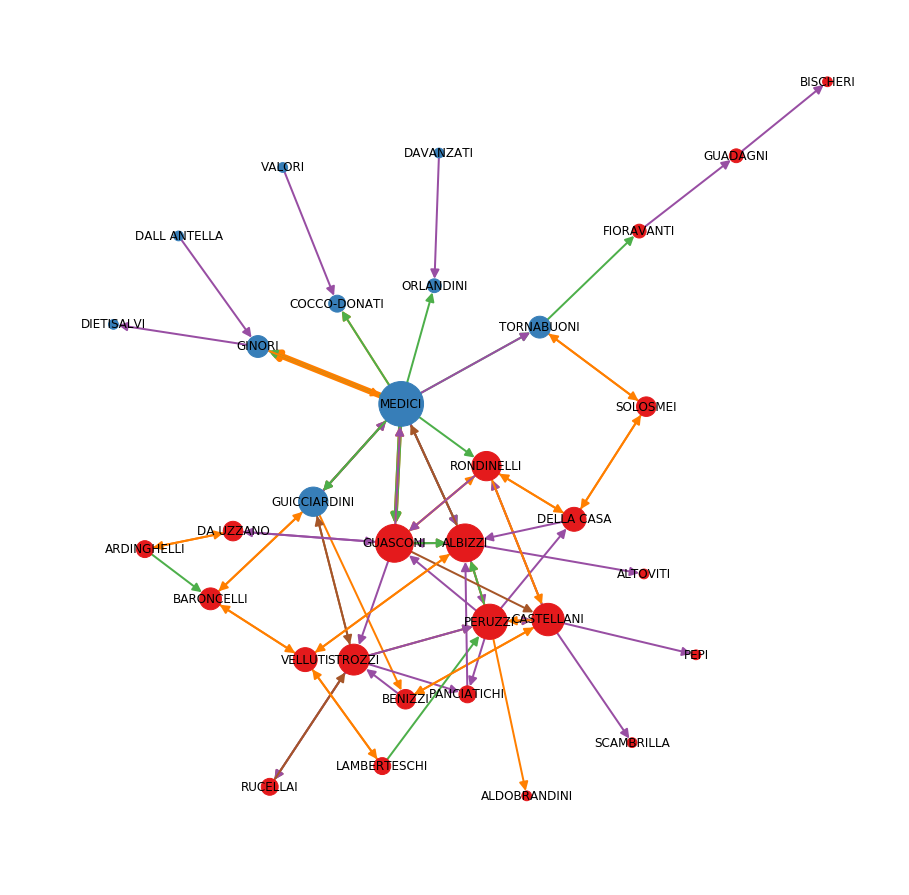

In [103]:
plt.figure(figsize=(12, 12))
nx.draw(M, pos=M_pos, arrowsize=18, with_labels=True, node_size=M_degree_centrality, node_color=M_node_color, width=M_width, edge_color=M_edge_color)

#### Closeness Centrality

In [104]:
M_closeness_centrality = list(nx.closeness_centrality(M).values())
M_closeness_centrality = [2000/max(M_closeness_centrality)*x for x in M_closeness_centrality]
M_closeness_centrality[:5]

[1560.0000000000002,
 1772.7272727272727,
 2000.0000000000002,
 1591.8367346938778,
 1147.058823529412]

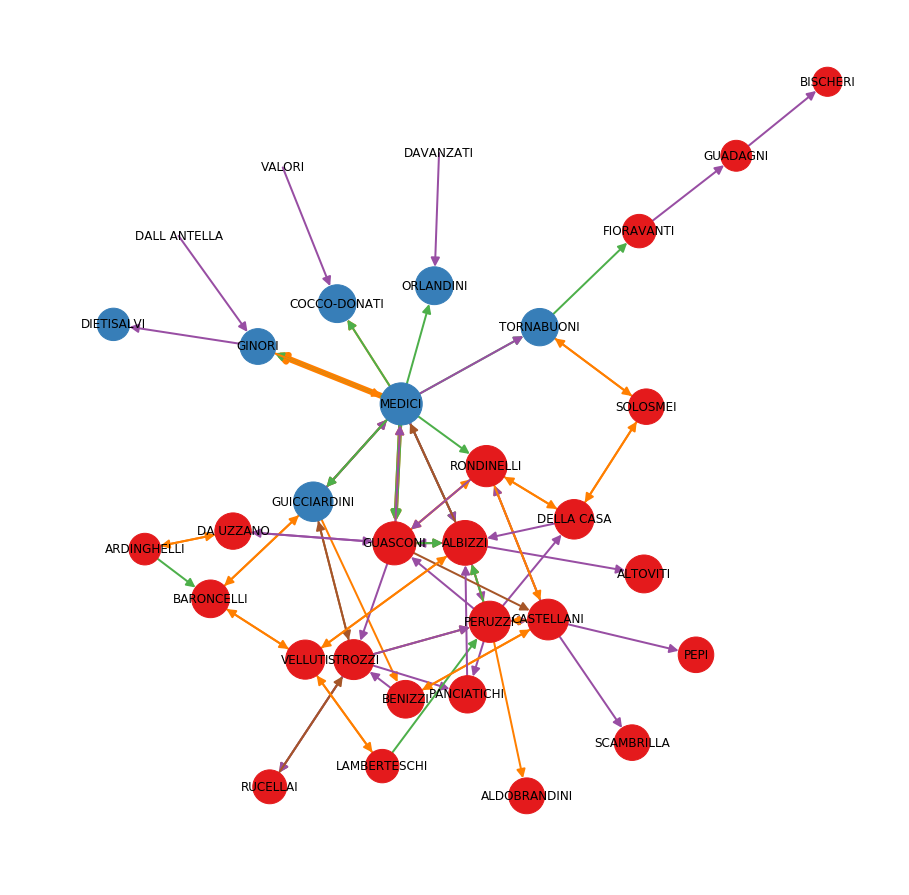

In [105]:
plt.figure(figsize=(12, 12))
nx.draw(M, pos=M_pos, arrowsize=18, with_labels=True, node_size=M_closeness_centrality, node_color=M_node_color, width=M_width, edge_color=M_edge_color)

#### Betweenness Centrality

In [106]:
M_betweenness_centrality = list(nx.betweenness_centrality(M).values())
M_betweenness_centrality = [2000/max(M_betweenness_centrality)*x for x in M_betweenness_centrality]
M_betweenness_centrality[:5]

[750.6929724441542,
 1999.9999999999998,
 1505.2992010435346,
 792.760476112832,
 0.0]

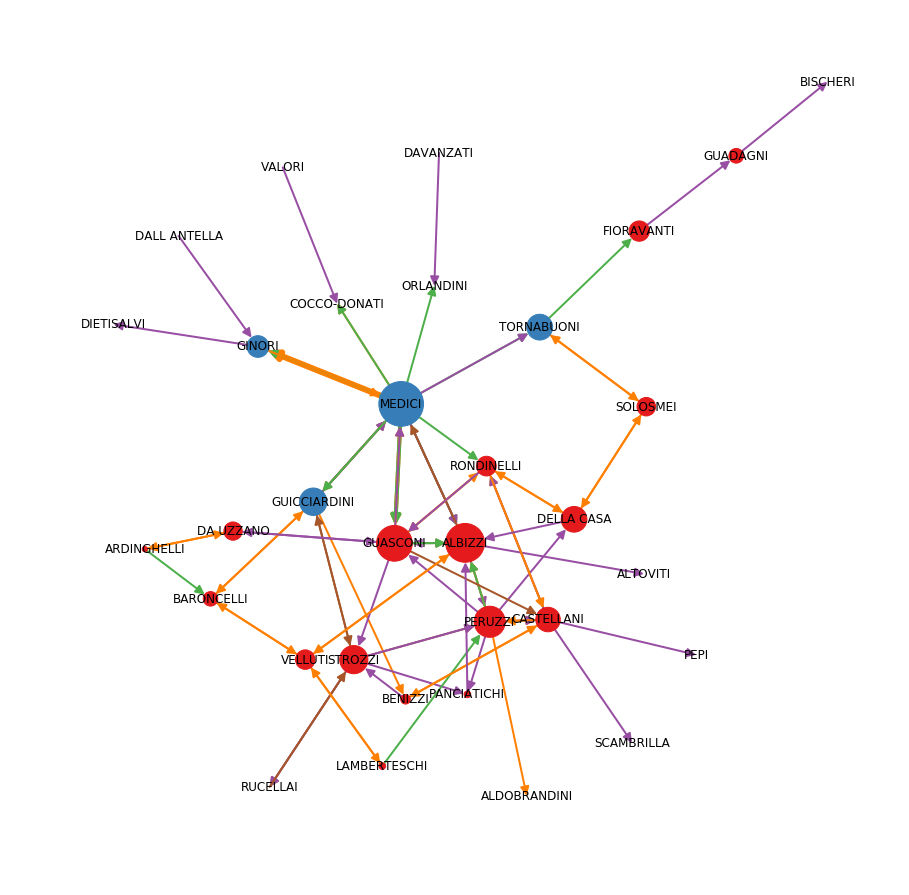

In [107]:
plt.figure(figsize=(12, 12))
nx.draw(M, pos=M_pos, arrowsize=18, with_labels=True, node_size=M_betweenness_centrality, node_color=M_node_color, width=M_width, edge_color=M_edge_color)

## 1.2.4 Bipartite Networks and Link Communities <a name='1_2_4'></a>

<img src='images/model_selection.png'>

### 1.2.4.1 Selection Graph <a name='1_2_4_1'></a>

In [108]:
selections = pd.read_csv('../data/bipartite.txt', header='infer', delimiter='\t', encoding='utf-8')
selections

,transaction,fact
0,a1,f1
1,a1,f2
2,a1,f3
3,a1,f4
4,a1,f5
5,a2,f3
6,a2,f4
7,a2,f5
8,a2,f6
9,a3,f5


In [109]:
B = nx.Graph()

In [110]:
B.add_edges_from(selections.values)

In [111]:
from networkx.algorithms import bipartite

In [112]:
#transactions, facts = bipartite.sets(B)

In [113]:
nx.is_connected(B)

False

In [114]:
transactions, facts = set(selections['transaction']), set(selections['fact'])
transactions, facts

({'a1', 'a2', 'a3', 'a4', 'a5'},
 {'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9'})

In [115]:
B_pos = nx.bipartite_layout(B, transactions)

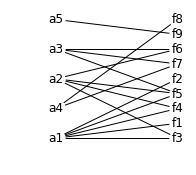

In [116]:
plt.figure(figsize = (2, 2))
nx.draw(B, pos=B_pos, with_labels=True, node_color='white')

In [117]:
B_pos = {'a1': np.array([-0.33333333, 0.66666667]),
         'a2': np.array([-0.33333333, 0.33333333]),
         'a3': np.array([-0.33333333, 0.]),
         'a4': np.array([-0.33333333, -0.33333333]),
         'a5': np.array([-0.33333333, -0.66666667]),
         'f1': np.array([ 0.33333333, 0.80000000]),
         'f2': np.array([ 0.33333333, 0.60000000]),
         'f3': np.array([ 0.33333333, 0.40000000]),
         'f4': np.array([ 0.33333333, 0.20000000]),
         'f5': np.array([ 0.33333333, 0.]),
         'f6': np.array([ 0.33333333, -0.20000000]),
         'f7': np.array([ 0.33333333, -0.40000000]),
         'f8': np.array([ 0.33333333, -0.60000000]),
         'f9': np.array([ 0.33333333, -0.80000000])}

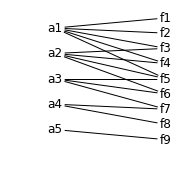

In [118]:
plt.figure(figsize = (2, 2))
nx.draw(B, pos=B_pos, with_labels=True, node_color='white')

### 1.2.4.2 Projection to Transaction Co-Fact Graph <a name='1_2_4_2'></a>

In [119]:
I = bipartite.weighted_projected_graph(B, transactions)
I.edges(data=True)

EdgeDataView([('a1', 'a2', {'weight': 3}), ('a1', 'a3', {'weight': 1}), ('a4', 'a3', {'weight': 1}), ('a2', 'a3', {'weight': 2})])

In [120]:
I_width = list(nx.get_edge_attributes(I, 'weight').values())

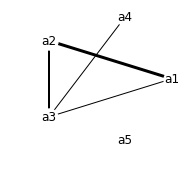

In [121]:
plt.figure(figsize=(2, 2))
nx.draw_circular(I, with_labels=True, node_color='white', width=I_width)

### 1.2.4.3 Projection to Fact Co-Transaction Graph <a name='1_2_4_3'></a>

In [122]:
H = bipartite.weighted_projected_graph(B, facts)

In [123]:
H_width = list(nx.get_edge_attributes(H, 'weight').values())

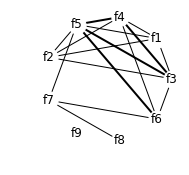

In [124]:
plt.figure(figsize=(2, 2))
nx.draw_circular(H, with_labels=True, node_color='white', width=H_width)

### 1.2.4.4 Duality of Groups and Link Communities <a name='1_2_4_4'></a>

In [125]:
transactions_groups = pd.read_csv('../data/bipartite_transactions_groups.txt', header='infer', delimiter='\t', encoding='utf-8')
transactions_groups

,transaction,group
0,a1,0
1,a2,0
2,a3,0
3,a4,1
4,a5,1


In [126]:
group_color = {0: '#e41a1c', 1: '#377eb8'}

#### Transaction Co-Fact Graph

In [127]:
def plot_transaction_graph(selections, transactions_groups, group_color):
    from networkx.algorithms import bipartite
    %matplotlib inline
    import matplotlib.pyplot as plt
    #colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']
    # create and populate bipartite selection graph
    B = nx.Graph()
    B.add_edges_from(selections.values)
    # set modes of graph
    transactions, facts = set(selections['transaction']), set(selections['fact'])
    # project selection graph to transaction graph
    I = bipartite.weighted_projected_graph(B, transactions)
    # assign node color based on group affiliation
    for i in range(0, len(transactions_groups)):
        I.nodes[transactions_groups.iloc[i]['transaction']]['color'] = group_color[transactions_groups.iloc[i]['group']]
    # store node color in list
    I_node_color = list(nx.get_node_attributes(I, 'color').values())
    # store edge width in list
    I_width = list(nx.get_edge_attributes(I, 'weight').values())
    # plot transaction graph
    plt.figure(figsize=(2, 2))
    nx.draw_circular(I, with_labels=True, node_color=I_node_color, width=I_width)

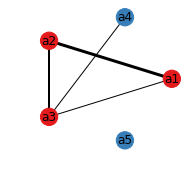

In [128]:
plot_transaction_graph(selections, transactions_groups, group_color)

#### Fact Co-Transaction Graph

In [129]:
transactions_groups

,transaction,group
0,a1,0
1,a2,0
2,a3,0
3,a4,1
4,a5,1


In [130]:
def plot_fact_graph(selections, transactions_groups, group_color):
    from networkx.algorithms import bipartite
    %matplotlib inline
    import matplotlib.pyplot as plt
    # create and populate bipartite selection graph
    B = nx.Graph()
    B.add_edges_from(selections.values)
    # set modes of graph
    transactions, facts = set(selections['transaction']), set(selections['fact'])
    # project selection graph to transaction graph
    H = bipartite.weighted_projected_graph(B, facts)
    # store group transactions in a list and build color palette
    transactions_group = []
    colors = []
    for i in transactions_groups['group'].drop_duplicates():
        transactions_group.append(set(transactions_groups[transactions_groups['group'] == i]['transaction']))
        colors.append(group_color[i])
    # store group selections in a list using group transactions
    selections_group = []
    for i in range(0, len(transactions_group)):
        selections_group.append(selections[selections['transaction'].isin(transactions_group[i])])
    # store group bipartite graphs in a list using group selections
    B_group = []
    for i in range(0, len(transactions_group)):
        B = nx.Graph()
        B.add_edges_from(selections_group[i].values)
        B_group.append(B)
    # store group facts in a list using group selections
    facts_group = []
    for i in range(0, len(transactions_group)):
        facts_group.append(set(selections_group[i]['fact']))
    # store group fact graphs in a list using group bipartite graphs and group facts
    H_group = []
    for i in range(0, len(transactions_group)):
        H_group.append(bipartite.weighted_projected_graph(B_group[i], facts_group[i]))
    # store group edge widths in a list using group fact graphs
    H_width_group = []
    for i in range(0, len(transactions_group)):
        H_width_group.append(list(nx.get_edge_attributes(H_group[i], 'weight').values()))
    # store nodes and group edges in a multigraph
    H_multi = nx.MultiGraph()
    H_multi.add_nodes_from(H.nodes)
    for i in range(0, len(transactions_group)):
        H_multi.add_edges_from(H_group[i].edges(data=True), color=colors[i])
    # store edge colors in list
    H_multi_edge_color = list(nx.get_edge_attributes(H_multi, 'color').values())
    # store edge widths in list
    H_multi_width = list(nx.get_edge_attributes(H_multi, 'weight').values())
    # plot fact graph
    plt.figure(figsize=(2, 2))
    nx.draw_circular(H_multi, with_labels=True, node_color='white', edge_color=H_multi_edge_color, width=H_multi_width)

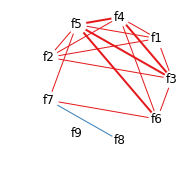

In [131]:
plot_fact_graph(selections, transactions_groups, group_color)